In [2]:

from easydict import EasyDict as edict
import os

opt = edict({'savingroot':'../result','dataset':'MNIST', 'nc':1,'num_epoches':20,'p1':1.0,'p2':0.09})
print(opt)


    
def load_result(p1,p2):
    dataset_root = opt.dataset +'/'+ opt.dataset + '_' + str(p2)
    f = open(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/'  + 'acc.txt'), 'r')
    f_f = f.readlines()
    acc = []
    for line in f_f:
       acc.append(float(line.strip('\n')))
    f.close()
    
    f = open(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/' + 'acc_f_train.txt'), 'r')
    f_f = f.readlines()
    acc_f = []
    for line in f_f:
       acc_f.append(float(line.strip('\n')))
    f.close()
    return acc,acc_f

acc,acc_f = load_result(1.0,0.1)
print(acc)
print(acc_f)



{'savingroot': '../result', 'dataset': 'MNIST', 'nc': 1, 'num_epoches': 20, 'p1': 1.0, 'p2': 0.09}
[0.2495, 0.3271, 0.5305, 0.6089, 0.5375, 0.4836, 0.58, 0.5584, 0.5546, 0.5522, 0.5484, 0.5367, 0.5344, 0.5342, 0.5343, 0.5325, 0.5329, 0.5312, 0.5322, 0.5319]
[0.7449, 0.7348, 0.7588, 0.7648, 0.7734, 0.7647, 0.7661, 0.768, 0.7673, 0.7672, 0.7699, 0.7678, 0.7682, 0.7691, 0.7697, 0.7694, 0.769, 0.769, 0.7693, 0.7691]


In [2]:
p1_all=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
p1_all_reverse = [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
p2_all=[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]


    

In [9]:
#load complementary accuracy which change with the proportion of ground truth label
p2 = 0.1
acc_c = []
acc_c_f = []
for p1 in p1_all_reverse:
    acc_c.append(load_result(p1,p2)[0][-1])
    acc_c_f.append(load_result(p1,p2)[1][-1])
print(acc_c)
print(acc_c_f)
acc0=acc_c
acc_f0 = acc_c_f

[0.8672, 0.9227, 0.944, 0.9554, 0.9627, 0.9639, 0.9656, 0.9696, 0.967, 0.9747, 0.973]
[0.9206, 0.9344, 0.9408, 0.9599, 0.962, 0.9588, 0.9648, 0.9657, 0.9681, 0.9695, 0.9668]


In [10]:
#load complementary accuracy which change with the proportion of unlabel label
p1 =1.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    if p2==0:
        acc_c.append(None)
        acc_c_f.append(None)
    else:
        acc_c.append(load_result(p1,p2)[0][-1])
        acc_c_f.append(load_result(p1,p2)[1][-1])
            
    
print(acc_c)
print(acc_c_f)
acc1=acc_c
acc_f1 = acc_c_f

[None, 0.2297, 0.3484, 0.5439, 0.6068, 0.7846, 0.8073, 0.7909, 0.8331, 0.8828, 0.8672]
[None, 0.3837, 0.6266, 0.6739, 0.9012, 0.8979, 0.8838, 0.8723, 0.9032, 0.8911, 0.9206]


In [11]:
#load ground truth accuracy which change with the total traing ground truth data
p1 =0.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    try:
        if p2==0:
            acc_c.append(None)
            acc_c_f.append(None)
        else:
            acc_c.append(load_result(p1,p2)[0][-1])
            acc_c_f.append(load_result(p1,p2)[1][-1])
    except:
        acc_c.append(None)
        acc_c_f.append(None)
print(acc_c)
print(acc_c_f)
acc2=acc_c
acc_f2 = acc_c_f

[None, 0.9061, 0.9301, 0.9453, 0.9511, 0.9593, 0.9635, 0.968, 0.97, 0.971, 0.973]
[None, 0.8912, 0.9258, 0.9395, 0.953, 0.9585, 0.9612, 0.9489, 0.9679, 0.9633, 0.9668]


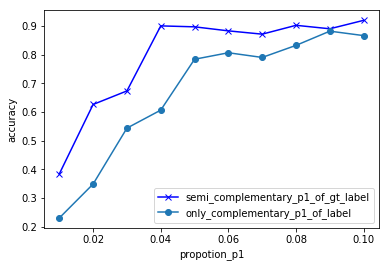

In [22]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
plt.plot(p2_all,acc_f1,'xb-',label='semi_complementary_p1_of_gt_label')
plt.plot(p2_all,acc1,'o-',label='only_complementary_p1_of_label')
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
# plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p1')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p1.eps', format='eps', dpi=1000)

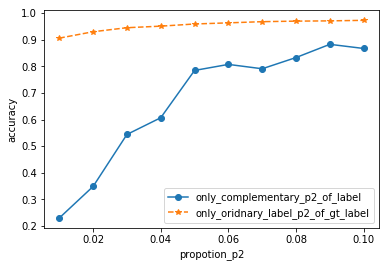

In [23]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
# plt.plot(p2_all,acc_f1,'xb-',label='semi_complementary_p_of_gt_label')
plt.plot(p2_all,acc1,'o-',label='only_complementary_p2_of_label')
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p2_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p2')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p2.eps', format='eps', dpi=1000)

In [1]:
###load M
import torch
import numpy as np
p2_all=[0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5]
ncls = 10
rho = 1.0
M_r = (rho / (ncls - 1)) * np.ones((ncls, ncls))  #
for i in range(ncls):
    M_r[i, i] = 1. - rho
M_r = torch.from_numpy(M_r).float()

def M_abs(p1,p2):
    dataset_root = opt.dataset +'/'+ opt.dataset + '_' + str(p2)
    M = torch.load(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/'  + 'M.pth'))
    
    M_d = torch.sum(torch.abs(M-M_r)).numpy()
    
    M_f = torch.load(os.path.join(opt.savingroot,dataset_root,str(p1 * 100) + '%complementary/'  + 'M_f.pth'))
    M_f_d = torch.sum(torch.abs(M_f-M_r)).numpy()
    return M_d,M_f_d

In [3]:
#load ground truth accuracy which change with the total traing ground truth data
p1 =1.0
acc_c = []
acc_c_f = []
for p2 in p2_all:
    if p2==0:
        acc_c.append(0.1)
        acc_c_f.append(0.1)
    else:
        acc_c.append(load_result(p1,p2)[0][-1])
        acc_c_f.append(load_result(p1,p2)[1][-1])
print(acc_c)
print(acc_c_f)
acc4=acc_c
acc_f4 = acc_c_f

[0.3161, 0.3548, 0.4174, 0.4152, 0.5106, 0.5319, 0.7133, 0.8912, 0.8579, 0.943]
[0.377, 0.5847, 0.6473, 0.8128, 0.7984, 0.7691, 0.882, 0.9328, 0.9389, 0.9533]


In [4]:
#load ground truth accuracy which change with the total traing ground truth data
p1 =1.0
M_list = []
M_f_list = []
for p2 in p2_all:
    if p2==0:
        M_list.append(0.1)
        M_f_list.append(0.1)
    else:
        M_list.append(M_abs(p1,p2)[0])
        M_f_list.append(M_abs(p1,p2)[1])
print(M_list)

[array(3.9170263, dtype=float32), array(3.6018343, dtype=float32), array(2.7996473, dtype=float32), array(2.7876966, dtype=float32), array(3.2805831, dtype=float32), array(2.2642696, dtype=float32), array(2.107281, dtype=float32), array(0.8718641, dtype=float32), array(1.1842111, dtype=float32), array(0.60596013, dtype=float32)]


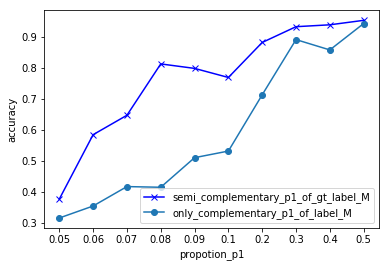

In [16]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
plt.plot(np.arange(0,10),acc_f4,'xb-',label='semi_complementary_p1_of_gt_label_M')
plt.plot(np.arange(0,10),acc4,'o-',label='only_complementary_p1_of_label_M')
plt.xticks(np.arange(0,10),p2_all)
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
# plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p_of_gt_label')
plt.ylabel('accuracy')
plt.xlabel('propotion_p1')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p1.eps', format='eps', dpi=1000)

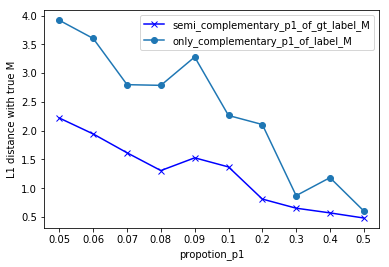

In [17]:
import matplotlib.pyplot as plt
beingsaved = plt.figure()
plt.plot(np.arange(0,10),M_f_list,'xb-',label='semi_complementary_p1_of_gt_label_M')
plt.plot(np.arange(0,10),M_list,'o-',label='only_complementary_p1_of_label_M')
plt.xticks(np.arange(0,10),p2_all)
# plt.plot(p2_all,acc0,'*-',label='mix_complementary_p_of_oridnary_label')
# plt.plot(p2_all,acc2,'*--',label='only_oridnary_label_p_of_gt_label')
plt.ylabel('L1 distance with true M')
plt.xlabel('propotion_p1')
plt.legend()
# plt.show()
beingsaved.savefig(opt.dataset+'p1.eps', format='eps', dpi=1000)